<a href="https://colab.research.google.com/github/Myavuzars/MachineLearning/blob/main/Income_1_Exploring_the_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np

from pandas import read_csv
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestRegressor

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
incomedf = pd.read_csv(
    "/content/drive/MyDrive/Colab Notebooks/Machine Learning /Income/adult.csv")

incomedf.head(4)

,id,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,1,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,2,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,3,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,4,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K


In [ ]:
incomedf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   id              32561 non-null  int64 
 1   age             32561 non-null  int64 
 2   workclass       32561 non-null  object
 3   fnlwgt          32561 non-null  int64 
 4   education       32561 non-null  object
 5   education_num   32561 non-null  int64 
 6   marital_status  32561 non-null  object
 7   occupation      32561 non-null  object
 8   relationship    32561 non-null  object
 9   race            32561 non-null  object
 10  sex             32561 non-null  object
 11  capital_gain    32561 non-null  int64 
 12  capital_loss    32561 non-null  int64 
 13  hours_per_week  32561 non-null  int64 
 14  native_country  32561 non-null  object
 15  income          32561 non-null  object
dtypes: int64(7), object(9)
memory usage: 4.0+ MB


#DEALING WITH MISSING VALUES

In [ ]:
#Dealing with missing values (in General)
is_NaN = incomedf.isnull()
row_has_NaN = is_NaN.any(axis=1)
rows_with_NaN = incomedf[row_has_NaN]
print(rows_with_NaN)

Empty DataFrame
Columns: [id, age, workclass, fnlwgt, education, education_num, marital_status, occupation, relationship, race, sex, capital_gain, capital_loss, hours_per_week, native_country, income]
Index: []


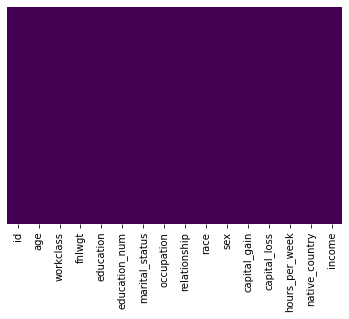

In [ ]:
# Using heat map to check if there is any missing values
sns.heatmap(incomedf.isnull(), yticklabels=False, cbar=False, cmap='viridis')
plt.show()


In [ ]:
#Dealing with Missing values
NA_count= incomedf.isna().sum() 
print(NA_count)
###
nan_value = float("NaN")
NA_count= incomedf.isna().sum() 
print(NA_count)

id                0
age               0
workclass         0
fnlwgt            0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
income            0
dtype: int64
id                0
age               0
workclass         0
fnlwgt            0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
income            0
dtype: int64


In [ ]:
#Drop All Missing values
incomedf.dropna(inplace=True)

GETTING KNOW THE DATA

In [ ]:
# Unique count for each data
def column_count(file):
  countn = incomedf.nunique(axis=0)
  return countn

column_count(incomedf) 

id                32561
age                  73
workclass             9
fnlwgt            21648
education            16
education_num        16
marital_status        7
occupation           15
relationship          6
race                  5
sex                   2
capital_gain        119
capital_loss         92
hours_per_week       94
native_country       42
income                2
dtype: int64

In [ ]:
incomedf.head()

,id,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,1,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,2,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,3,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,4,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,5,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


id is id, fnlwgt is sampling weight, education is a string representation of the education_num column, therefore these column can be removed.


In [ ]:
#Dropping unnecessary data
newdf = incomedf.drop(["id",'education', 'fnlwgt'], axis=1)
newdf.iloc[0:10]

,age,workclass,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
5,37,Private,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
6,49,Private,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
7,52,Self-emp-not-inc,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
8,31,Private,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
9,42,Private,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K


In [ ]:
sns.set_style('whitegrid')

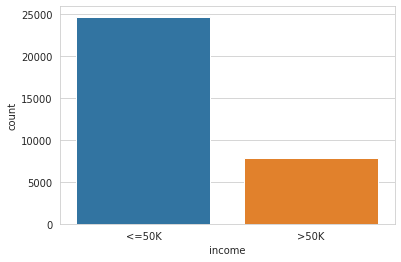

In [ ]:
sns.countplot(x='income', data=newdf)
plt.show()

In [ ]:
print(len(newdf[newdf['income']=='<=50K']))
print(len(newdf[newdf['income']=='>50K']))

24720
7841


This dataset is imbalanced because the number of income class which is <=50K  is higher than the number of income class wich is >50K. Approximately,75% of the dataset belongs to low income class, and 25% of the dataset belnongs to high income class.

Index(['age', 'education_num', 'capital_gain', 'capital_loss',
       'hours_per_week'],
      dtype='object')


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fa00c140990>,
      dtype=object)

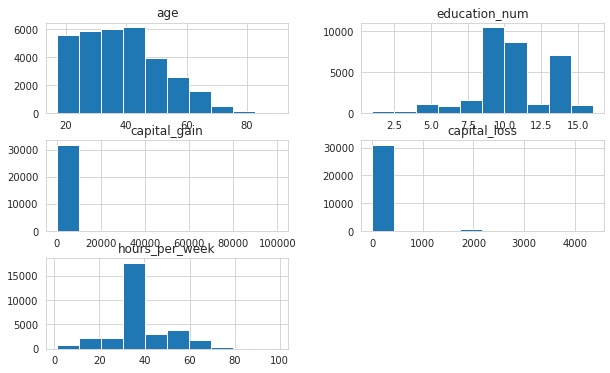

In [ ]:
numerical_columns = newdf.select_dtypes(include=['int'])
print(numerical_columns.columns)
numerical_columns.hist(figsize=(10,6))

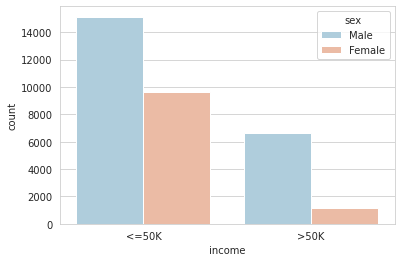

In [ ]:
sns.countplot(x='income', hue='sex',data=newdf, palette='RdBu_r')
plt.show()

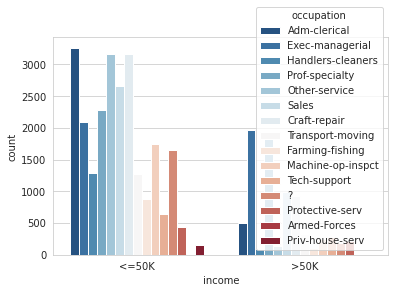

In [ ]:
sns.countplot(x='income', hue='occupation',data=newdf, palette='RdBu_r')
plt.show()

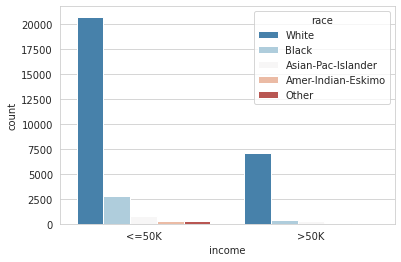

In [ ]:
sns.countplot(x='income', hue='race',data=newdf, palette='RdBu_r')
plt.show()

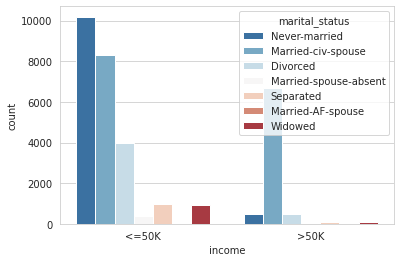

In [ ]:
sns.countplot(x='income', hue='marital_status',data=newdf, palette='RdBu_r')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


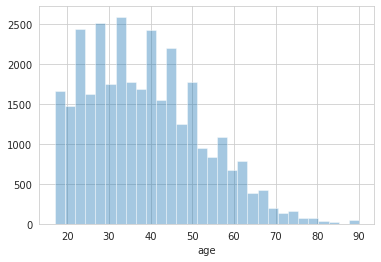

In [ ]:
sns.distplot(newdf['age'].dropna(), kde=False, bins=30)
plt.show()

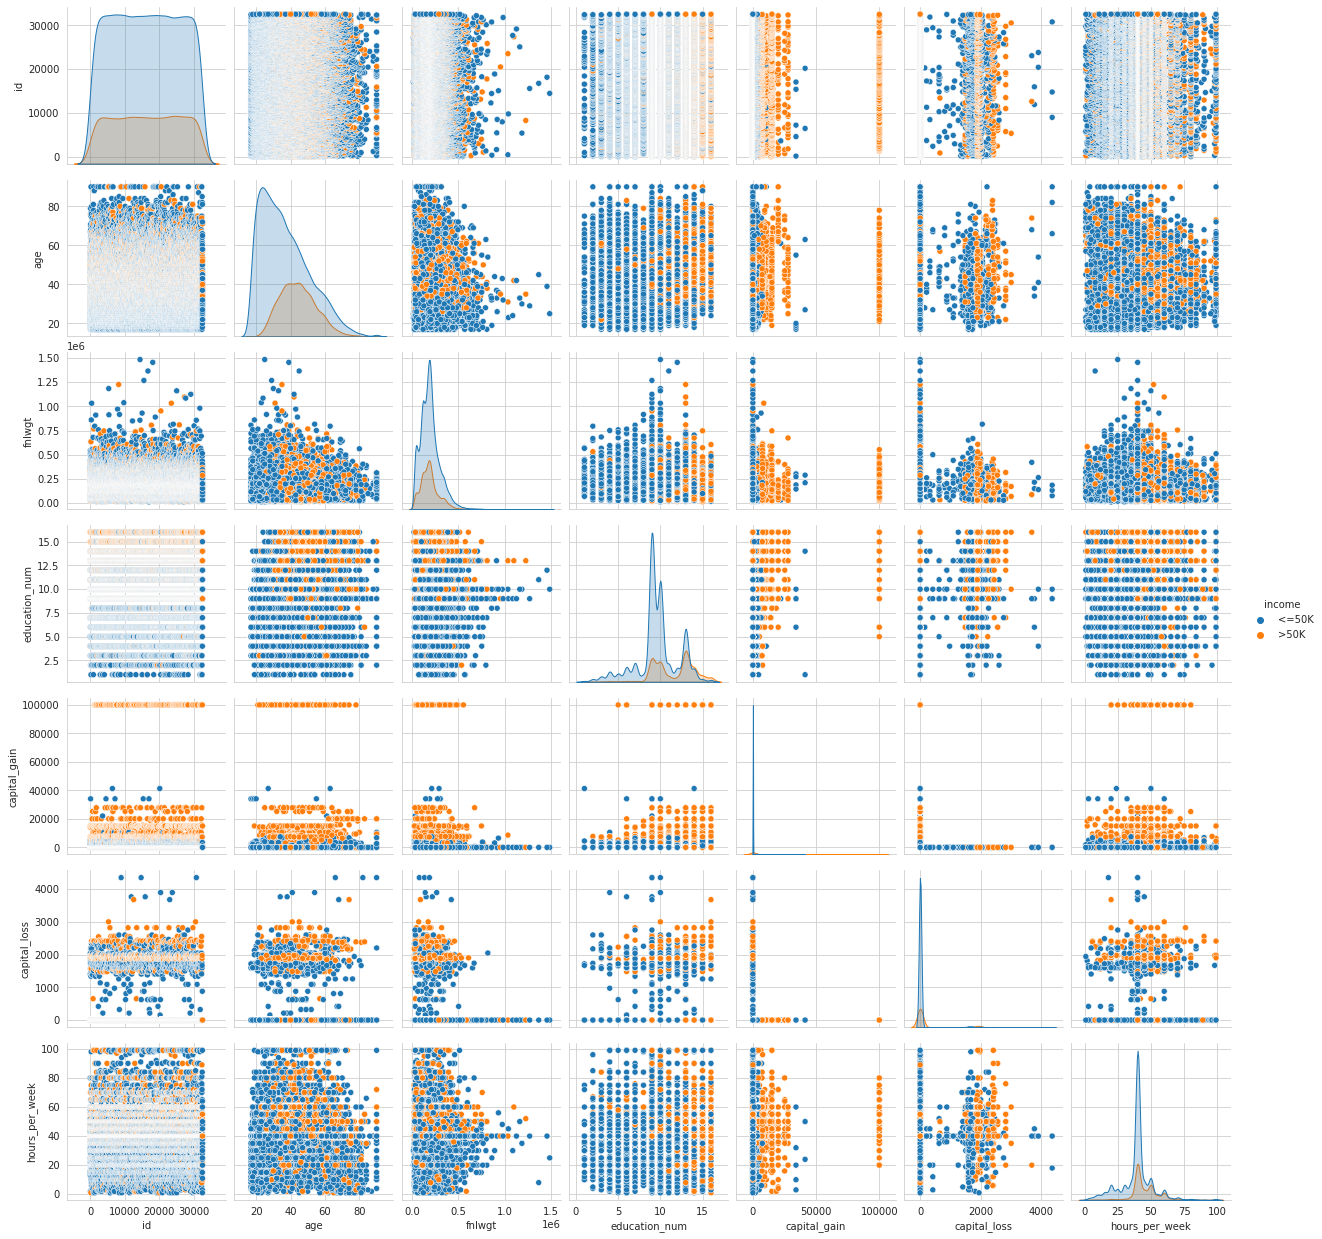

In [ ]:
sns.pairplot(incomedf, hue="income")

In [30]:
#Table for Sex and income
M1= len(newdf[(newdf["sex"]=="Male") & (newdf["income"]=="<=50K")])
M2= len(newdf[(newdf["sex"]=="Male") & (newdf["income"]==">50K")])
F1= len(newdf[(newdf["sex"]=="Female") & (newdf["income"]=="<=50K")])
F2= len(newdf[(newdf["sex"]=="Female") & (newdf["income"]==">50K")])
R1= M2/(M1+M2)
R2= F2/(F1+F2)

data =[{"Male":M1, "Female":F1}, {"Male":M2, "Female":F2}, {"Male":R1,"Female":R2}]
sidf =pd.DataFrame(data, index= ['Low Income','High Income',"High Income Ratio"])
sidf

,Male,Female
Low Income,15128.000000,9592.000000
High Income,6662.000000,1179.000000
High Income Ratio,0.305737,0.109461


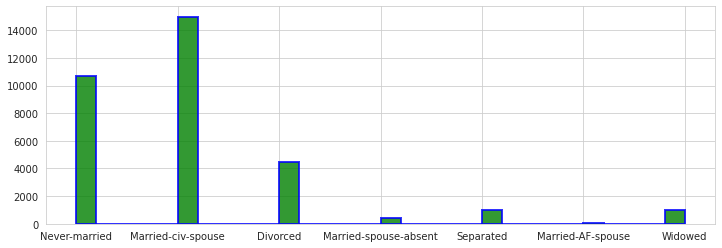

In [31]:
#newdf['marital_status'].hist()

plt.figure(figsize=(12,4)) #change your figure size as per your desire here
n,bins,patch = plt.hist(newdf['marital_status'],bins=30, color='green', alpha=0.8, label='Value', edgecolor='blue', linewidth=2)


plt.show()

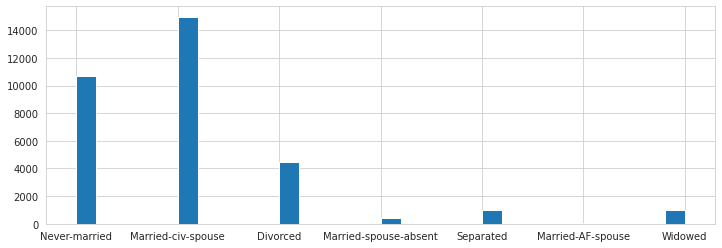

In [32]:
newdf['marital_status'].hist(bins=30, figsize=(12,4))
plt.show()

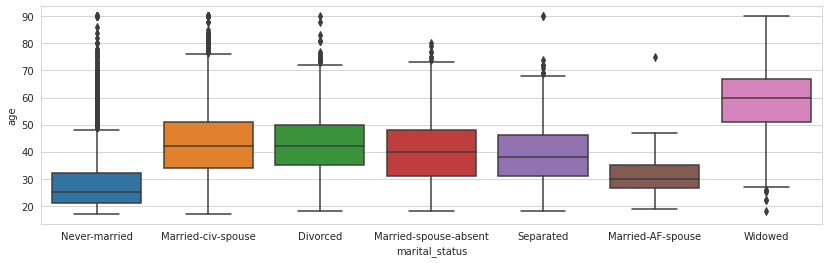

In [33]:
plt.figure(figsize=(14,4))
sns.boxplot(x='marital_status',y='age', data=newdf)
plt.show()

In [34]:
#Mean for column given condition
ave1=newdf.loc[ newdf['marital_status']=='Divorced','age'].mean()

#Mean for column given condition
newdf.loc[newdf['education_num']==9, 'age'].mean()

38.974478621083705

In [35]:
#Impute missing observartions
def impute_age (cols):
  age=cols[0]
  marital_status=cols[1]

  if pd.isnull(age):
    if marital_status=='Divorced':
      return ave1

In [36]:
#Implement the impute function 
newdf['age'] = newdf[['age','marital_status']].apply(impute_age, axis=1)




In [37]:
from collections import Counter
target = incomedf.values[:,-1]
counter = Counter(target)
for k,v in counter.items():
	per = v / len(target) * 100
	print('Class=%s, Count=%d, Percentage=%.3f%%' % (k, v, per))

Class=<=50K, Count=24720, Percentage=75.919%
Class=>50K, Count=7841, Percentage=24.081%


In [38]:
# select columns with numerical data types
num_ix = newdf.select_dtypes(include=['int64', 'float64']).columns
# select a subset of the dataframe with the chosen columns
subset = newdf[num_ix]

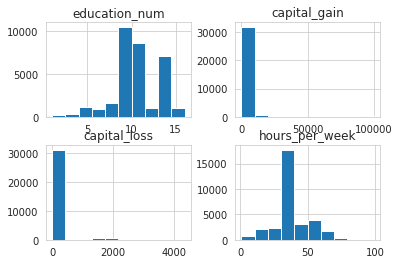

In [40]:
from pandas import read_csv
from matplotlib import pyplot
# create a histogram plot of each numeric variable
subset.hist()
pyplot.show()